In [1]:
import pandas as pd
import time
import os
import keras
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import RMSprop

import matplotlib
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf

import seaborn as sns

In [2]:

# Useful Constants

# Output classes to learn how to classify
LABELS = [
    "arching_back",
    "head_banging",
    "kicking_legs",
    "rubbing_eye",
    "stretching",
    "sucking_fingers"
]

DATASET_PATH = "C:\\Users\\Yurtsever\\baby-activity-recog-new\\"

X_train_path = DATASET_PATH + "X_train.txt"
X_test_path = DATASET_PATH + "X_test.txt"

y_train_path = DATASET_PATH + "Y_train.txt"
y_test_path = DATASET_PATH + "Y_test.txt"

n_steps = 20 # 20 timesteps per series

In [3]:
# Load the networks inputs

def load_X(X_path):
    file = open(X_path, 'r')
    X_ = np.array(
        [elem for elem in [
            row.split(',') for row in file
        ]], 
        dtype=np.float32
    )
    file.close()
    #blocks = int(len(X_) / n_steps)
    
    #X_ = np.array(np.split(X_,blocks))

    return X_ 

# Load the networks outputs

def load_y(y_path):
    file = open(y_path, 'r')
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    
    # for 0-based indexing 
    return y_ - 1

X_train = load_X(X_train_path)
X_test = load_X(X_test_path)
#print X_test

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)
# proof that it actually works for the skeptical: replace labelled classes with random classes to train on
#for i in range(len(y_train)):
#    y_train[i] = randint(0, 5)

In [4]:
print(X_train)

[[0.499398 0.246288 0.484095 ... 0.428835 0.491752 0.251768]
 [0.496335 0.246263 0.474909 ... 0.423358 0.491729 0.251717]
 [0.496344 0.240816 0.474917 ... 0.409768 0.485622 0.243557]
 ...
 [0.610051 0.431201 0.623814 ... 0.741836 0.       0.      ]
 [0.611568 0.444827 0.62689  ... 0.749998 0.       0.      ]
 [0.610056 0.450263 0.629945 ... 0.755431 0.       0.      ]]


In [5]:
#scalar = MinMaxScaler()
#X_train = scalar.fit_transform(X_train)

In [6]:
print(X_train)

[[0.499398 0.246288 0.484095 ... 0.428835 0.491752 0.251768]
 [0.496335 0.246263 0.474909 ... 0.423358 0.491729 0.251717]
 [0.496344 0.240816 0.474917 ... 0.409768 0.485622 0.243557]
 ...
 [0.610051 0.431201 0.623814 ... 0.741836 0.       0.      ]
 [0.611568 0.444827 0.62689  ... 0.749998 0.       0.      ]
 [0.610056 0.450263 0.629945 ... 0.755431 0.       0.      ]]


In [7]:
X_train.shape

(49580, 38)

In [8]:
print(y_test)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]


## Block creation

In [9]:
blocks = int(len(X_train) / 20)
X_train = np.array(np.split(X_train, blocks))
X_train.shape

(2479, 20, 38)

In [10]:
blocks = int(len(X_test) / 20)
X_test = np.array(np.split(X_test, blocks))
X_test.shape

(597, 20, 38)

In [11]:
y_train.shape

(2479, 1)

In [12]:
label_encoder = LabelEncoder()
Y_train = np.array(y_train)
Y_train = label_encoder.fit_transform(y_train)

C:\Users\Yurtsever\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [13]:
print(Y_train)

[0 0 0 ... 5 5 5]


In [14]:
label_encoder.classes_

array([0, 1, 2, 3, 4, 5])

In [15]:
Y_train = to_categorical(Y_train)

In [16]:
y_test = to_categorical(y_test)

In [17]:
print(Y_train)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [18]:
model = Sequential()

model.add(LSTM(32, input_shape=(20, 38), dropout=0.1, recurrent_dropout=0.5, return_sequences=True, activation='sigmoid')) # input_shape=(20, 50)

model.add(LSTM(16, input_shape=(20, 38), dropout=0.1, recurrent_dropout=0.5, return_sequences=True, activation='sigmoid'))

model.add(LSTM(8, input_shape=(20, 38), dropout=0.1, recurrent_dropout=0.5, return_sequences=False, activation='sigmoid'))

#model.add(Dense(32))
model.add(Dense(32))

model.add(Dense(6, activation='softmax'))

In [19]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy']) # adam

In [20]:
history = model.fit(X_train, Y_train, validation_data=(X_test, y_test), epochs=70, batch_size=16)

Epoch 1/70
155/155 [==============================] - 12s 29ms/step - loss: 1.7620 - accuracy: 0.2315 - val_loss: 1.6189 - val_accuracy: 0.0854
Epoch 2/70
155/155 [==============================] - 3s 21ms/step - loss: 1.7016 - accuracy: 0.2439 - val_loss: 1.3648 - val_accuracy: 0.7035
Epoch 3/70
155/155 [==============================] - 3s 20ms/step - loss: 1.5333 - accuracy: 0.3731 - val_loss: 1.0805 - val_accuracy: 0.5695
Epoch 4/70
155/155 [==============================] - 3s 20ms/step - loss: 1.4099 - accuracy: 0.3734 - val_loss: 1.0460 - val_accuracy: 0.4355
Epoch 5/70
155/155 [==============================] - 3s 20ms/step - loss: 1.3743 - accuracy: 0.3840 - val_loss: 0.9913 - val_accuracy: 0.7035
Epoch 6/70
155/155 [==============================] - 3s 20ms/step - loss: 1.3413 - accuracy: 0.3942 - val_loss: 1.0195 - val_accuracy: 0.4372
Epoch 7/70
155/155 [==============================] - 3s 20ms/step - loss: 1.3075 - accuracy: 0.4223 - val_loss: 1.0231 - val_accuracy: 0.447

Epoch 58/70
155/155 [==============================] - 3s 20ms/step - loss: 0.4767 - accuracy: 0.8296 - val_loss: 0.7202 - val_accuracy: 0.6951
Epoch 59/70
155/155 [==============================] - 3s 20ms/step - loss: 0.5224 - accuracy: 0.8111 - val_loss: 0.4837 - val_accuracy: 0.8660
Epoch 60/70
155/155 [==============================] - 3s 20ms/step - loss: 0.4970 - accuracy: 0.8265 - val_loss: 0.4871 - val_accuracy: 0.8760
Epoch 61/70
155/155 [==============================] - 3s 20ms/step - loss: 0.5074 - accuracy: 0.8214 - val_loss: 0.4859 - val_accuracy: 0.8744
Epoch 62/70
155/155 [==============================] - 3s 20ms/step - loss: 0.4869 - accuracy: 0.8189 - val_loss: 0.5379 - val_accuracy: 0.8241
Epoch 63/70
155/155 [==============================] - 3s 20ms/step - loss: 0.5090 - accuracy: 0.8144 - val_loss: 0.6113 - val_accuracy: 0.8074
Epoch 64/70
155/155 [==============================] - 3s 20ms/step - loss: 0.4756 - accuracy: 0.8341 - val_loss: 0.7768 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


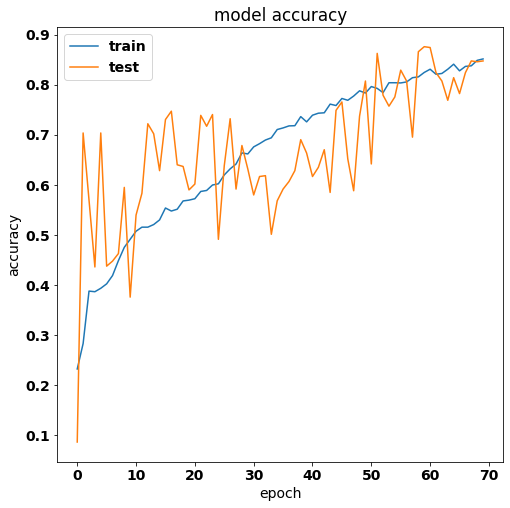

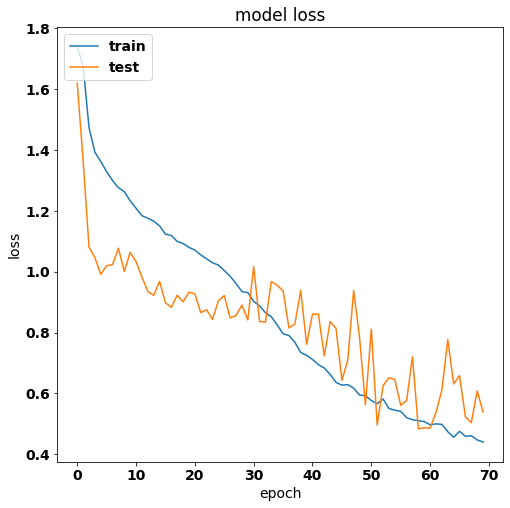

In [21]:
# (Inline plots: )

font = {
    'weight' : 'bold',
    'size'   : 14
}
matplotlib.rc('font', **font)

width = 8
height = 8
plt.figure(figsize=(width, height))


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

font = {
    'weight' : 'bold',
    'size'   : 14
}
matplotlib.rc('font', **font)

width = 8
height = 8
plt.figure(figsize=(width, height))


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
y_true = y_test
y_pred = model.predict_classes(X_test)

classes=["arching_back", "head_banging", "kicking_legs", "rubbing_eye", "stretching", "sucking_fingers"]

C:\Users\Yurtsever\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


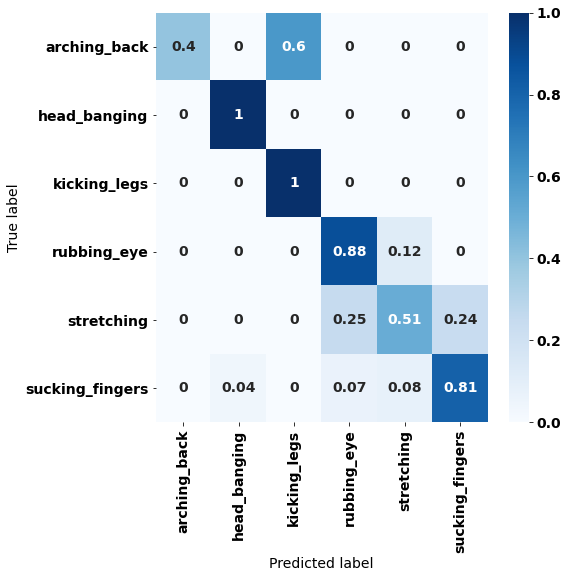

In [23]:
con_mat = tf.math.confusion_matrix(labels=y_true.argmax(axis=1), predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
y_pred = model.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1)))

In [25]:
print(confusion_matrix)

[[  4   0   6   0   0   0]
 [  0  28   0   0   0   0]
 [  0   0 164   0   0   0]
 [  0   0   0  77  11   0]
 [  0   0   0  13  26  12]
 [  0  10   0  19  20 207]]


In [26]:
print(y_test)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [27]:
import tensorflow as tf
conf_matrix = tf.math.confusion_matrix(labels=y_test.argmax(axis=1),
                                       predictions=y_pred)

InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [597] != values[1].shape = [597,6] [Op:Pack] name: stack

In [ ]:
print(conf_matrix)